<a href="https://colab.research.google.com/github/ttoygar/CatsAndDogsTransferLearning/blob/main/Transfer_Learning_Cats_Dogs_MODEL_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.applications import ResNet50

In [2]:
DATADIR = "/content/drive/MyDrive/DATASCI/kagglecatsanddogs/PetImages"

with open(os.path.join(DATADIR, "catsndogs.pickle"),"rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_test = data["X_test"]
X_val = data["X_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]

In [3]:
IMG_SIZE = 64
NUM_CLASSES = 2
INPUT_SHAPE = (64,64,3)

In [4]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', input_shape=INPUT_SHAPE))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = True

94781440/94765736 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
y_val.shape

(3696,)

In [9]:
train_model = model.fit(
    X_train, 
    y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/20
274/274 [==============================] - 40s 84ms/step - loss: nan - accuracy: 0.4991 - val_loss: nan - val_accuracy: 0.5092
Epoch 2/20
274/274 [==============================] - 21s 77ms/step - loss: nan - accuracy: 0.4989 - val_loss: nan - val_accuracy: 0.5092
Epoch 3/20
274/274 [==============================] - 21s 76ms/step - loss: nan - accuracy: 0.4989 - val_loss: nan - val_accuracy: 0.5092
Epoch 4/20
274/274 [==============================] - 21s 77ms/step - loss: nan - accuracy: 0.4989 - val_loss: nan - val_accuracy: 0.5092
Epoch 5/20
274/274 [==============================] - 21s 76ms/step - loss: nan - accuracy: 0.4989 - val_loss: nan - val_accuracy: 0.5092
Epoch 6/20
274/274 [==============================] - 21s 77ms/step - loss: nan - accuracy: 0.4989 - val_loss: nan - val_accuracy: 0.5092
Epoch 7/20
274/274 [==============================] - 23s 85ms/step - loss: nan - accuracy: 0.4989 - val_loss: nan - val_accuracy: 0.5092
Epoch 8/20
274/274 [==============

In [13]:
train_model.evaluate(X_test, y_test)

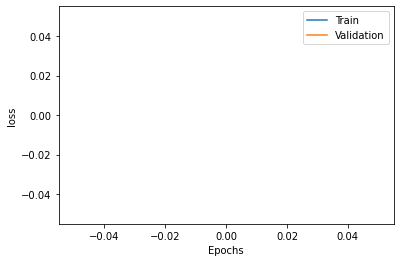

In [11]:
plt.plot(train_model.history["loss"], label="Train")
plt.plot(train_model.history["val_loss"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

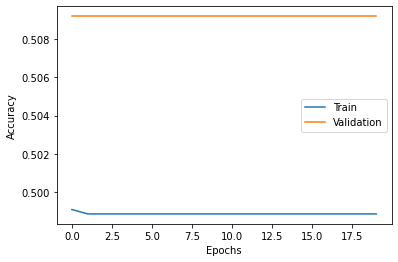

In [12]:
plt.plot(train_model.history["accuracy"], label="Train")
plt.plot(train_model.history["val_accuracy"], label="Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [13]:
with open("catsanddogs_model.pickle", "wr") as f:
    pickle.dump(train_model, f)